In [ ]:
# Import necessary packages
import io
from google.colab import files

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Build a classification model that predicts the edibility of mushrooms (class variable in the dataset). You have been provide with a dataset as a mushrooms.csv file. 
Here is a description of the attributes


Attribute description:
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
23. class: p = poisonous, e=edible


1. Build a classification tree. Random_state =2020. Training partition 0.7. stratify = y, max_depth = 6, use Entropy (8 marks)



A. Read the dataset, explore it and determine what is the dependent variable (1 mark)

In [ ]:
uploaded = files.upload()

Saving mushrooms.csv to mushrooms.csv


In [ ]:
# Read in and explore the data set
df = pd.read_csv(io.BytesIO(uploaded["mushrooms.csv"]))
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


As we can see, since we want to predict the edibility of mushrooms, thus 'class' is the dependent variable

B. Store the feature and target variable. (2 marks)

In [ ]:
y = df['class']
X = df.drop(columns='class')

C. Convert all categorical variables into dummy variables (1 mark)

In [ ]:
y = pd.get_dummies(y)
X = pd.get_dummies(X)

y = y['e']

D. Partition the data into training and test sets (70/30) (1 mark)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2020, stratify=y)

E. Fit the training data to a classification tree. (3 marks)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', random_state=2020, max_depth=6)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2020, splitter='best')

2. Print the confusion matrix. 
Also visualize the confusion matrix using plot_confusion_matrix from sklearn.metrics (3 marks)



[[1175    0]
 [   0 1263]]


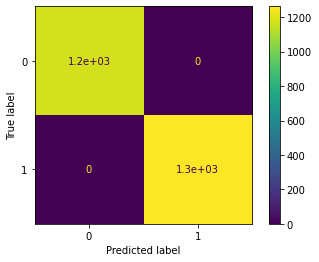

In [ ]:
from sklearn import metrics

y_predicted = dt.predict(X_test)
cnf = metrics.confusion_matrix(y_test, y_predicted)
print(cnf)

import matplotlib.pyplot as plt

metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()

3. Print the accuracy on the training partition?  (2 marks)


In [ ]:
from sklearn.metrics import accuracy_score

training_pred = dt.predict(X_train)
print("Accuracy on the training partition is", accuracy_score(y_train, training_pred))

Accuracy on the training partition is 1.0


4. Print the accuracy on the test partition? (2 marks)


In [ ]:
print("Accuracy on the test partition is", metrics.accuracy_score(y_test, y_predicted))

Accuracy on the test partition is 1.0


5. Show the classification tree and save it (5 marks)


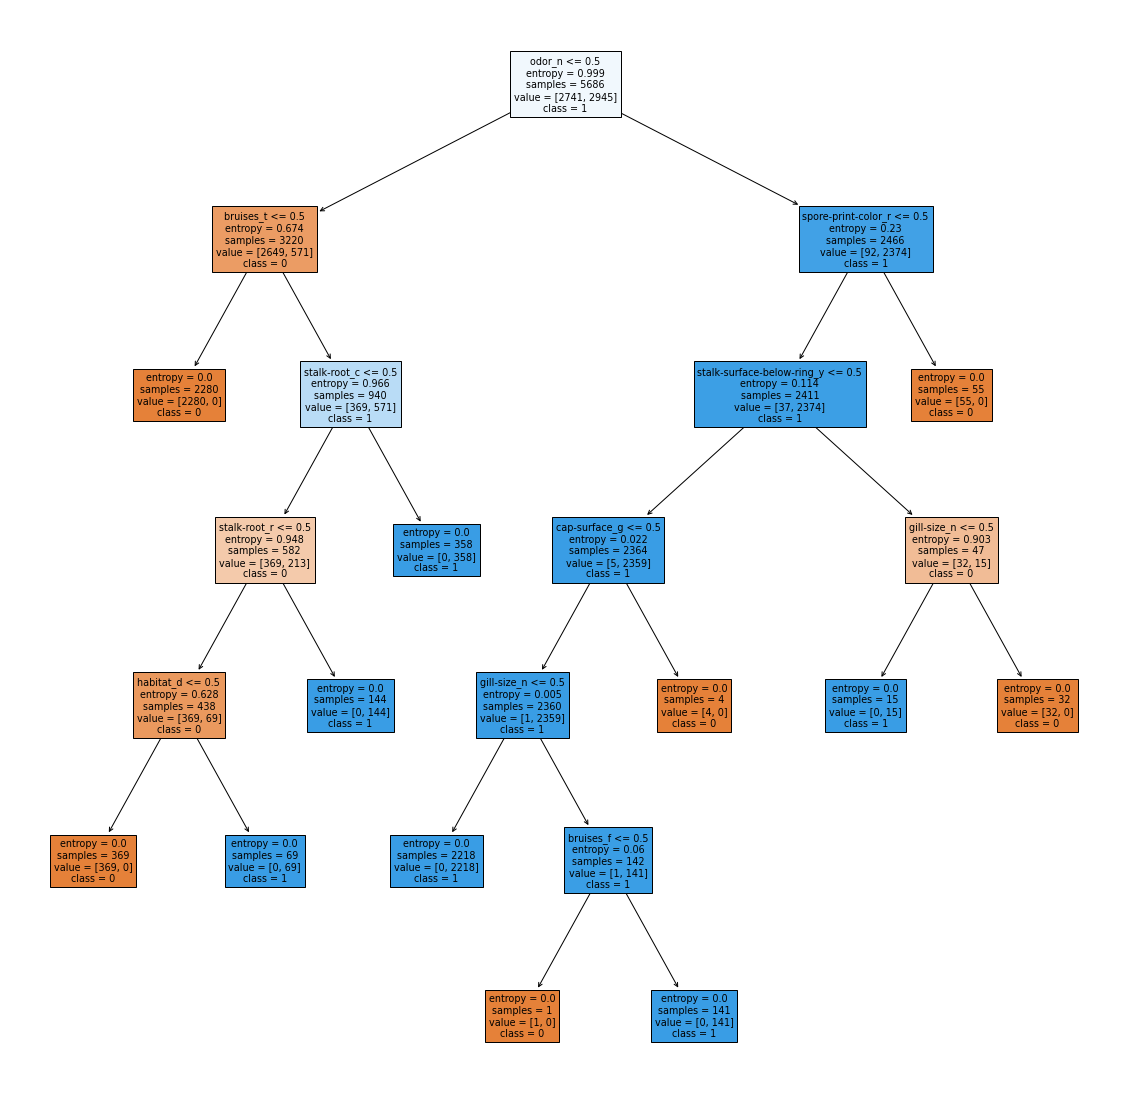

In [ ]:
from sklearn import tree

plt.figure(figsize=(20, 20))

fn = X.columns
cn = list(map(str, dt.classes_.tolist()))
mushroomEdilibityTree = tree.plot_tree(dt, feature_names=fn, class_names=cn, filled=True)
plt.savefig('mushroomDT.png')
plt.show()

6. Find and print the top three most important features in your decision tree for determining toxicity. (4 marks)

In [ ]:
imp = pd.DataFrame(zip(X_train.columns, dt.feature_importances_))
imp.sort_values(by=1, ascending=False).head(3)

,0,1
27,odor_n,0.518084
21,bruises_t,0.222239
53,stalk-root_c,0.062840


From above, we conclude that the top three most important features for determining the toxicity of a piece of mushroom is whether this piece of mushroom is of no odor, whether this piece of mushroom has bruises, and whether this piece of mushroom has club stalk-root

7. Classify the following mushroom. (6 marks)

class
 : **?**

cap-shape
: **x**

cap-surface
: **s**

cap-color
: **n**

bruises
: **t**

odor
: **y**

gill-attachment
: **f**

gill-spacing
: **c**

gill-size
: **n**

gill-color
: **k**

stalk-shape
: **e**

stalk-root
: **e**

stalk-surface-above-ring
: **s**

stalk-surface-below-ring
: **s**

stalk-color-above-ring
: **w**

stalk-color-below-ring
: **w**

veil-type
: **p**

veil-color
: **w**

ring-number
: **o**

ring-type
: **p**

spore-print-color
: **r**

population
: **s**

habitat
: **u**



In [ ]:
# Construct a piece of new mushroom information
newMushroom = pd.DataFrame()

newMushroom['cap-shape'] = ['x']
newMushroom['cap-surface'] = ['s']
newMushroom['cap-color'] = ['n']
newMushroom['bruises'] = ['t']
newMushroom['odor'] = ['y']
newMushroom['gill-attachment'] = ['f']
newMushroom['gill-spacing'] = ['c']
newMushroom['gill-size'] = ['n']
newMushroom['gill-color'] = ['k']
newMushroom['stalk-shape'] = ['e']
newMushroom['stalk-root'] = ['e']
newMushroom['stalk-surface-above-ring'] = ['s']
newMushroom['stalk-surface-below-ring'] = ['s']
newMushroom['stalk-color-above-ring'] = ['w']
newMushroom['stalk-color-below-ring'] = ['w']
newMushroom['veil-type'] = ['p']
newMushroom['veil-color'] = ['w']
newMushroom['ring-number'] = ['o']
newMushroom['ring-type'] = ['p']
newMushroom['spore-print-color'] = ['r']
newMushroom['population'] = ['s']
newMushroom['habitat'] = ['u']

# Store in and requery out the piece of new mushroom information from df
new_df = df.drop(columns='class').append(newMushroom)
new_df = pd.get_dummies(new_df)
newMushroom = new_df.iloc[len(new_df) - 1, :]

# Reshape this piece of information
newMushroom = np.array(newMushroom).reshape(-1, 117)

# Get the predicted result
if dt.predict(newMushroom):
  print('The given mushroom is edible')
else:
  print('The given mushroom is not edible')

The given mushroom is not edible
